# Импорт библиотек

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

# Реализация

## **Алгоритм золотого сечения**

In [2]:
def golden_ratio_algorithm(a: float, b: float, eps: float, func):
    """
    Реализует алгоритм золотого сечения для поиска минимума функции.

    Args:
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        eps (float): Точность поиска минимума.
        func (function): Целевая функция, минимум которой нужно найти.

    Returns:
        tuple: Кортеж, содержащий:
            - f_min (float): Минимальное значение функции.
            - x_min (float): Точка минимума.
            - iterations (int): Количество итераций.
            - function_calls (int): Количество вызовов целевой функции.
            - delta_history (list): История изменения длины интервала.
            - x_history (list): История предполагаемых экстремумов.
    """
    k = 0
    function_calls = 0
    delta_history = [b - a]
    x_history = []

    ratio_coeff = (3 - m.sqrt(5)) / 2

    y = a + ratio_coeff * (b - a)
    z = a + b - y

    f_y = func(y)
    f_z = func(z)
    function_calls += 2

    while abs(b - a) > eps:

        x_current = (a + b) / 2
        x_history.append(x_current)

        if f_y <= f_z:
            b = z
            z = y
            f_z = f_y
            y = a + ratio_coeff * (b - a)
            f_y = func(y)
        else:
            a = y
            y = z
            f_y = f_z
            z = a + b - y
            f_z = func(z)

        function_calls += 1
        k += 1
        delta_history.append(abs(b - a))

    x_min = (a + b) / 2
    f_min = func(x_min)
    function_calls += 1
    x_history.append(x_min)

    return f_min, x_min, k, function_calls, delta_history, x_history

### Целевая функция для золотого сечения

In [3]:
def function(argument: float) -> float:
  return (argument - 2) ** 2 + 1

## **Метод Брента для нахождения корня уравнения**

In [4]:
def brent_method_root(a: float, b: float, eps: float, func: float):
    """
    Реализует метод Брента для поиска корня уравнения.

    Args:
        a (float): Левая граница интервала поиска.
        b (float): Правая граница интервала поиска.
        eps (float): Точность поиска корня (по аргументу).
        func (function): Функция, корень которой нужно найти.

    Returns:
        tuple: Кортеж, содержащий:
            - root (float): Найденный корень.
            - iterations (int): Количество итераций.
            - function_calls (int): Количество вызовов функции.
            - history (list): История вычисленных точек.
    """

    fa = func(a)
    fb = func(b)
    if fa * fb > 0:
        raise ValueError("Функция должна иметь разные знаки на концах интервала")

    if abs(fa) < abs(fb):
        a, b = b, a
        fa, fb = fb, fa

    c = a
    fc = fa
    mflag = True
    delta = 0.0

    iterations = 0
    function_calls = 2
    history = []

    while abs(b - a) > eps and abs(fb) > 1e-12:

        if fa != fc and fb != fc:

            s = a * fb * fc / ((fa - fb) * (fa - fc)) + \
                b * fa * fc / ((fb - fa) * (fb - fc)) + \
                c * fa * fb / ((fc - fa) * (fc - fb))
        else:

            s = b - fb * (b - a) / (fb - fa)

        cond1 = s < min(3*a/4 + b/4, b) or (s > max(3*a/4 + b/4, b))
        cond2 = (mflag and abs(s - b) >= abs(b - c)/2)
        cond3 = (not mflag and abs(s - b) >= abs(c - delta)/2)
        cond4 = (mflag and abs(b - c) < eps)
        cond5 = (not mflag and abs(c - delta) < eps)

        if cond1 or cond2 or cond3 or cond4 or cond5:
            s = (a + b) / 2
            mflag = True
        else:
            mflag = False

        fs = func(s)
        function_calls += 1
        history.append(s)

        delta = c
        c = b
        fc = fb

        if fa * fs < 0:
            b = s
            fb = fs
        else:
            a = s
            fa = fs

        if abs(fa) < abs(fb):
            a, b = b, a
            fa, fb = fb, fa

        iterations += 1

    return b, iterations

### Задаем функции с гарантированными корнями

In [5]:
def function1(x):
  """
  Функция с гарантированным корнем (около 1.521).
  """
  return x ** 3 - x - 2

In [6]:
def function2(x):
  """
  Функция с гарантированным корнем (около 0.739).
  """
  return np.cos(x) - x

## **Визуализируем результаты**

In [7]:
def plot_golden_ratio_results(a, b, x_history, delta_history, x_min, function):

    plt.figure(figsize=(14, 10))

    plt.subplot(2, 1, 1)
    x_values = np.linspace(a, b, 1000)
    y_values = [function(x) for x in x_values]
    plt.plot(x_values, y_values, label="Целевая функция", linewidth=2)

    y_history = [function(x) for x in x_history]

    plt.scatter(
        x_history, y_history,
        color="red", s=50,
        label="Промежуточные точки"
    )

    plt.plot(x_history, y_history, 'r--', alpha=0.5)

    plt.axvline(
        x=x_min, color="green", linestyle="--",
        label=f"Найденный минимум: x = {x_min:.6f}"
    )

    plt.axvline(x=a, color="gray", linestyle=":", alpha=0.7)
    plt.axvline(x=b, color="gray", linestyle=":", alpha=0.7, label="Начальный интервал")

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Поиск минимума методом золотого сечения")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 1, 2)
    iterations = range(len(delta_history))
    plt.plot(iterations, delta_history, marker="o", color="blue", linestyle="-")

    for i, delta in enumerate(delta_history):
        if delta < 1e-6:
            plt.scatter(i, delta, color="red", s=100, zorder=5)
            plt.text(i, delta, f" Δ={delta:.2e}", fontsize=9, verticalalignment="bottom")
            break

    plt.xlabel("Номер итерации")
    plt.ylabel("Длина интервала")
    plt.title("Изменение длины интервала поиска")
    plt.grid(True)
    # plt.yscale("log")

    plt.tight_layout()
    plt.show()

In [8]:
def plot_all_functions():

    fig, axes = plt.subplots(3, 1, figsize=(10, 15))

    x1 = np.linspace(-1, 5, 400)
    y1 = [(x-2)**4 + 3*(x-1)**2 + 5 for x in x1]
    axes[0].plot(x1, y1, 'b-', linewidth=2)
    axes[0].set_title('Функция для золотого сечения: $(x-2)^4 + 3(x-1)^2 + 5$')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('f(x)')
    axes[0].grid(True)
    axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axes[0].axvline(x=0, color='k', linestyle='-', alpha=0.3)

    x2 = np.linspace(-1, 2, 400)
    y2 = [x**3 - x - 2 for x in x2]
    axes[1].plot(x2, y2, 'r-', linewidth=2)
    axes[1].set_title('Функция: $x^3 - x - 2$')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('f(x)')
    axes[1].grid(True)
    axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)

    x3 = np.linspace(-2, 3, 400)
    y3 = [np.cos(x) - x for x in x3]
    axes[2].plot(x3, y3, 'g-', linewidth=2)
    axes[2].set_title('Функция: $\cos(x) - x$')
    axes[2].set_xlabel('x')
    axes[2].set_ylabel('f(x)')
    axes[2].grid(True)
    axes[2].axhline(y=0, color='k', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.show()

## **Запускаем**

### Параметры задачи для золотого сечения

In [9]:
a, b, eps = -100, 99, 0.01

### Выполнение алгоритма золотого сечения

In [10]:
result = golden_ratio_algorithm(a, b, eps, function)
f_min, x_min, iterations, func_calls, delta_history, x_history = result

In [11]:
print("--- Результаты работы алгоритма золотого сечения ---")
print(f"Минимальное значение функции: {f_min:.5f}")
print(f"Точка минимума: {x_min:.5f}")
print(f"Количество итераций: {iterations}")
print(f"Количество вызовов функции: {func_calls}")
print(f"История сужения интервала: {delta_history}")

--- Результаты работы алгоритма золотого сечения ---
Минимальное значение функции: 1.00000
Точка минимума: 2.00149
Количество итераций: 21
Количество вызовов функции: 24
История сужения интервала: [199, 122.98876376122908, 76.01123623877092, 46.97752752245816, 29.033708716312784, 17.94381880614539, 11.089889910167393, 6.853928895977968, 4.2359610141894155, 2.6179678817885526, 1.617993132400863, 0.9999747493876421, 0.6180183830132029, 0.3819563663744392, 0.23606201663881077, 0.14589434973567528, 0.09016766690313549, 0.055726682832416774, 0.03444098407067209, 0.02128569876174513, 0.013155285309049969, 0.00813041345274268]


### Визуализация результатов золотого сечения

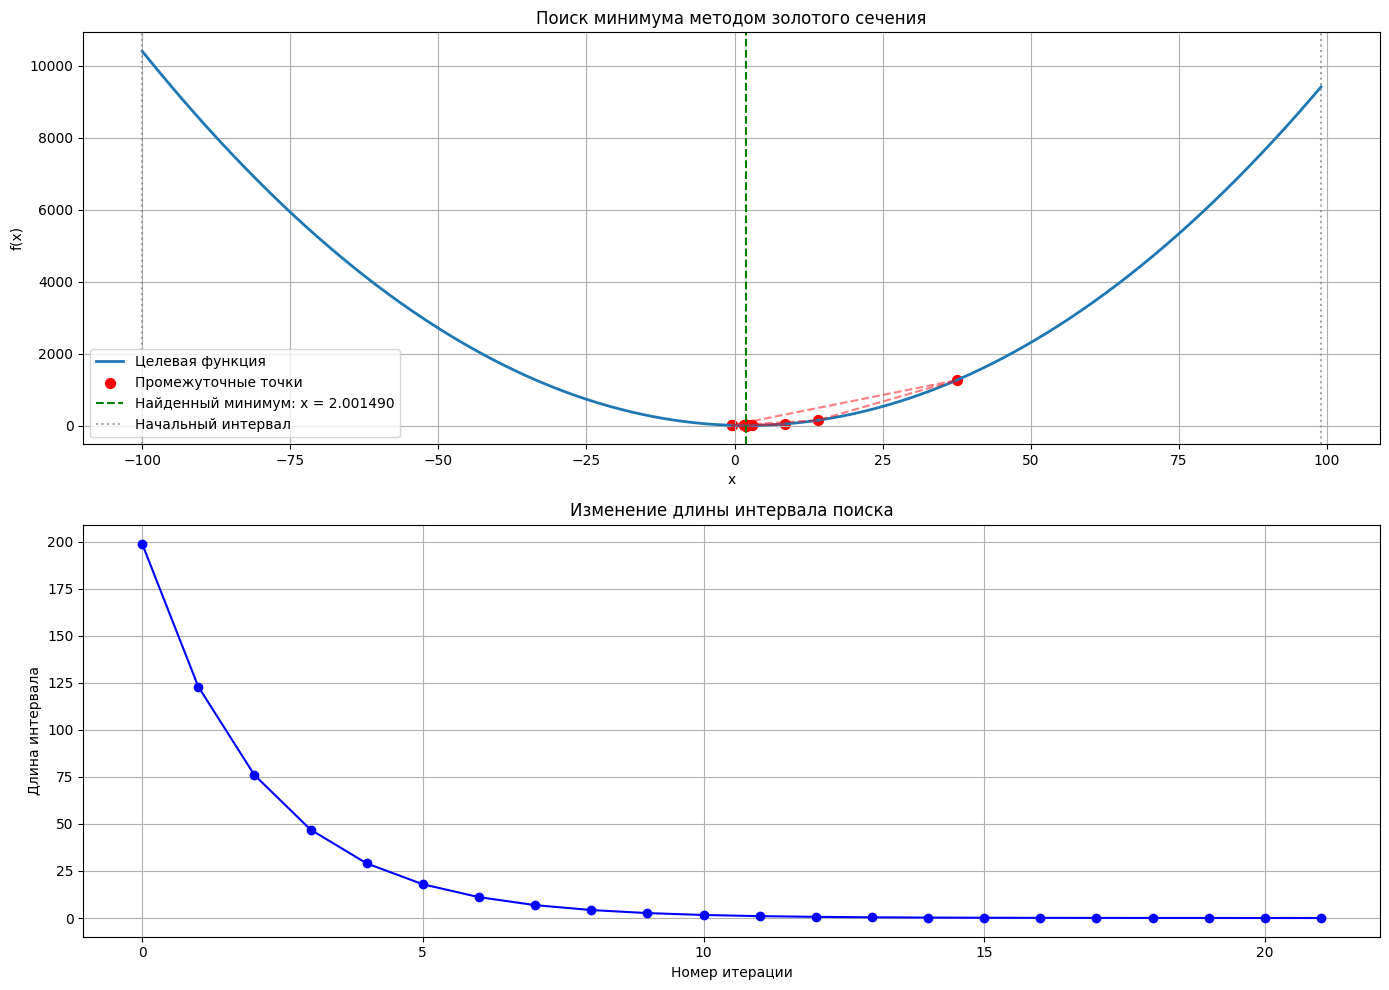

In [12]:
plot_golden_ratio_results(a, b, x_history, delta_history, x_min, function)


### Параметры для метода Брента

In [13]:
a1, b1, eps1 = 1, 2, 1e-6
a2, b2, eps2 = 0, 1, 1e-6

### Поиск корней методом Брента

In [14]:
root1, iter1 = brent_method_root(a1, b1, eps1, function1)
root2, iter2 = brent_method_root(a2, b2, eps2, function2)


### Истинные корни для расчёта СКО

In [15]:
true_root1 = 1.5213797068045676
true_root2 = 0.7390851332151607

### Расчёт СКО через NumPy с использованием .std()

####  Среднеквадратическое отклонение (СКО)

**СКО** (стандартное отклонение) — мера рассеивания значений вокруг среднего арифметического. Показывает, насколько данные отклоняются от среднего значения.

##  Формула:

$$s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

In [16]:
mse1 = np.array([root1, true_root1]).std()
mse2 = np.array([root2, true_root2]).std()


### Вывод и визуализация результатов для метода Брента


--- Результаты работы метода Брента ---
Функция: x^3 - x - 2
  Найденный корень: 1.5213797067
  Количество итераций: 6
  Вызовов функции: 6

Функция: cos(x) - x
  Найденный корень: 0.7390851332
  Количество итераций: 5
  Вызовов функции: 5


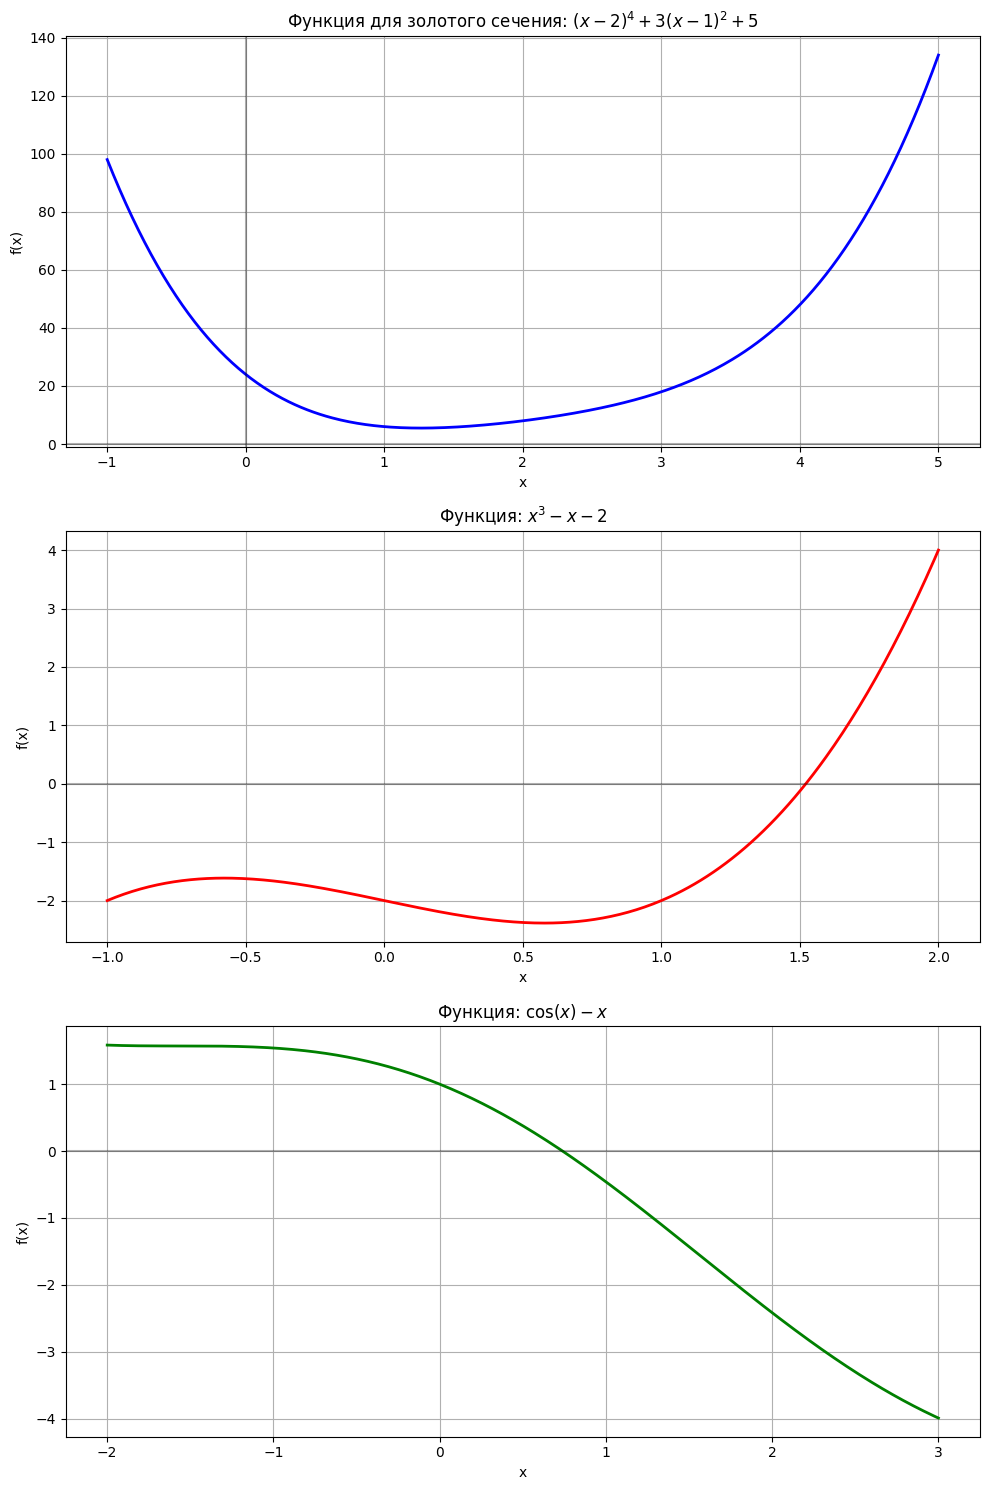

In [17]:
print("\n--- Результаты работы метода Брента ---")

print(f"Функция: x^3 - x - 2")
print(f"  Найденный корень: {root1:.10f}")
print(f"  Количество итераций: {iter1}")
print(f"  Вызовов функции: {iter1}")

print(f"\nФункция: cos(x) - x")
print(f"  Найденный корень: {root2:.10f}")
print(f"  Количество итераций: {iter2}")
print(f"  Вызовов функции: {iter2}")

plot_all_functions()